In [1]:
from image_adjust import load_det_model, random_blur, systematic_blur, object_blur, non_semantic_transform
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

/home/fieldaj1/.local/lib/python3.11/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
det_model = load_det_model()

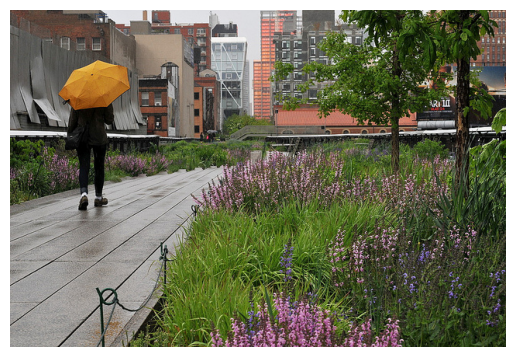

In [2]:
img_path = '/home/fieldaj1/thesis/data/VQA2.0/img/COCO_train2014_000000001216.jpg'
og_img = cv2.imread(img_path)
image_rgb = cv2.cvtColor(og_img, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [3]:
sem_tfs = systematic_blur(og_img)
neutral_tfs = non_semantic_transform(og_img)

In [4]:
def pic_grid(imgs):
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))
    for ax, img in zip(axes.flat, imgs):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
    sns.despine(left=True, bottom=True)
    plt.show()

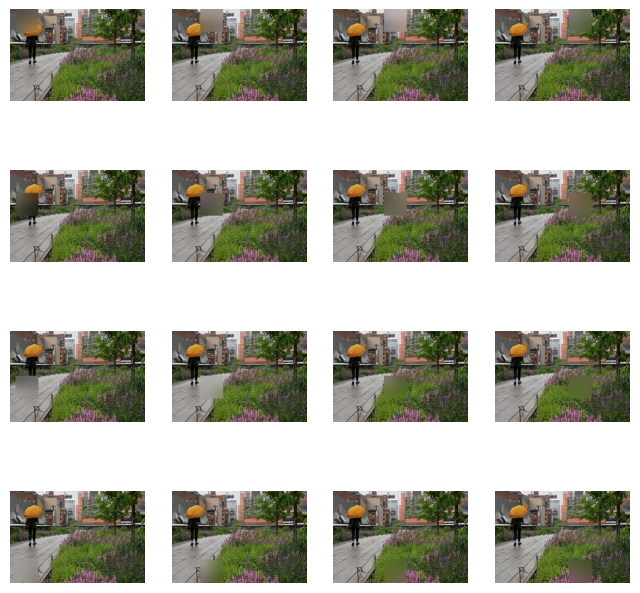

In [5]:
pic_grid(sem_tfs)

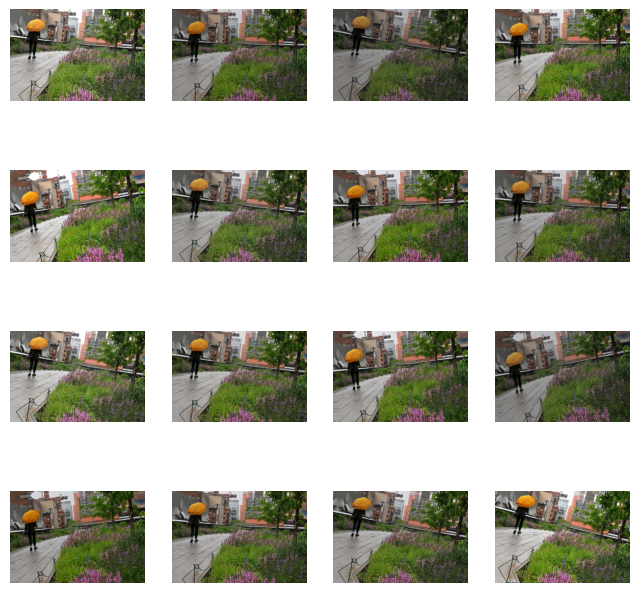

In [6]:
pic_grid(neutral_tfs)

In [9]:
cv2.imwrite('../data/dummy/sem_ex_1.jpg', sem_tfs[4])
cv2.imwrite('../data/dummy/sem_ex_2.jpg', sem_tfs[6])
cv2.imwrite('../data/dummy/neut_ex_1.jpg', neutral_tfs[2])
cv2.imwrite('../data/dummy/neut_ex_2.jpg', neutral_tfs[14])

True